In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [306]:
car_data = pd.read_csv('car_details_v3.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [307]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [308]:
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [309]:
car_data.quantile(q=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,year,selling_price,km_driven,seats
0.01,2002.0,55000.0,4000.0,4.0
0.10,2008.0,150000.0,15000.0,5.0
0.25,2011.0,254999.0,35000.0,5.0
0.50,2015.0,450000.0,60000.0,5.0
0.75,2017.0,675000.0,98000.0,5.0
0.90,2018.0,1025000.0,120000.0,7.0
0.99,2019.0,5200000.0,225000.0,9.0


In [310]:
car_data.loc[car_data['selling_price'] >= 5200000.0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
139,BMW X4 M Sport X xDrive20d,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.0
384,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
7757,BMW 5 Series 520d Luxury Line,2019,5200000,10000,Diesel,Dealer,Automatic,First Owner,18.12 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7872,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
7873,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0


In [311]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [312]:
car_data_dropped = car_data.dropna()

In [313]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [314]:
car_data_dropped.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [315]:
def drop_units(str_with_units):
    if isinstance(str_with_units, str):
        return float(str_with_units.split()[0])
    
car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
car_data_dropped['max_power'] = car_data_dropped['max_power'].apply(drop_units)


<ipython-input-315-47d2e4cf4f9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['mileage'] = car_data_dropped['mileage'].apply(drop_units)
<ipython-input-315-47d2e4cf4f9a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['engine'] = car_data_dropped['engine'].apply(drop_units)
<ipython-input-315-47d2e4cf4f9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [316]:
def get_torque(torque_str):
    if isinstance(torque_str, str):
        num = float(re.search(r'^[0-9]*\.?[0-9]+', torque_str)[0])
        if 'kgm' in torque_str:
            num *= 9.80665
        return num

In [317]:
car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)

<ipython-input-317-a53dc7d1291c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['torque'] = car_data_dropped['torque'].apply(get_torque)


In [318]:
car_data_dropped.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0


In [319]:
car_data_dropped.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [320]:
car_data_dropped['year'] = 2021 - car_data_dropped['year']
car_data_dropped

<ipython-input-320-dcd38b2404b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['year'] = 2021 - car_data_dropped['year']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0
3,Hyundai i20 Sportz Diesel,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0
4,Maruti Swift VXI BSIII,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0
8124,Hyundai Verna CRDi SX,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0
8125,Maruti Swift Dzire ZDi,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0
8126,Tata Indigo CR4,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0


In [321]:
def car_name(s):
    return s.split()[0]
car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)

<ipython-input-321-f24f0ea978ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(car_name)


In [322]:
car_data_dropped['name'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Ashok               1
Name: name, dtype: int64

In [323]:
'+'.join(car_data_dropped.columns)

'name+year+selling_price+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+seats'

In [324]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [325]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque+C(seats)',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     872.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:00:47   Log-Likelihood:            -1.1112e+05
No. Observations:                7906   AIC:                         2.224e+05
Df Residuals:                    7851   BIC:                         2.227e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        6.613e+05   2.76e+05      2.399      0.016    1.21e+05     1.2e+06
name[T.Ashok]                   -3.656e+05   3.47e+05     -1.054      0.292   -1.05e+06    3.14e+05
name[T.Audi]                     5.973e+05   1.65e+05      3.628      0.000    2.75e+05     9.2e+05
name[T.BMW]                      2.162e+06    1.6e+05     13.522      0.000    1.85e+06    2.48e+06
name[T.Chevrolet]               -5.133e+05   1.57e+05     -3.273      0.001   -8.21e+05   -2.06e+05
name[T.Daewoo]                   1.213e+05   2.37e+05      0.512      0.609   -3.43e+05    5.86e+05
name[T.Datsun]                  -5.542e+05   1.61e+05     -3.449      0.001   -8.69e+05   -2.39e+05
name[T.Fiat]                    -4.944e+05   1.63e+05     -3.039      0.002   -8.13e+05   -1.75e+05
name[T.Force]                   -4.527e+05      2e+05     -2.261      0.024   -8.45e+05   -6.02e+04
name[T.Ford]                     -4.31e+05   1.56e+05     -2.760      0.006   -7.37e+05   -1.25e+05
name[T.Honda]                   -4.334e+05   1.56e+05     -2.771      0.006    -7.4e+05   -1.27e+05
name[T.Hyundai]                  -4.23e+05   1.56e+05     -2.715      0.007   -7.28e+05   -1.18e+05
name[T.Isuzu]                    1.533e+05   2.08e+05      0.736      0.462   -2.55e+05    5.62e+05
name[T.Jaguar]                   1.022e+06   1.61e+05      6.339      0.000    7.06e+05    1.34e+06
name[T.Jeep]                       3.1e+05   1.66e+05      1.863      0.062   -1.62e+04    6.36e+05
name[T.Kia]                     -9763.6793   2.19e+05     -0.044      0.965    -4.4e+05     4.2e+05
name[T.Land]                     1.889e+06   2.01e+05      9.402      0.000     1.5e+06    2.28e+06
name[T.Lexus]                    3.028e+06   1.68e+05     18.032      0.000     2.7e+06    3.36e+06
name[T.MG]                       1.307e+05   2.38e+05      0.550      0.582   -3.35e+05    5.96e+05
name[T.Mahindra]                -4.347e+05   1.56e+05     -2.787      0.005    -7.4e+05   -1.29e+05
name[T.Maruti]                  -3.538e+05   1.56e+05     -2.270      0.023   -6.59e+05   -4.83e+04
name[T.Mercedes-Benz]            7.381e+05   1.62e+05      4.552      0.000     4.2e+05    1.06e+06
name[T.Mitsubishi]              -1.465e+05   1.76e+05     -0.834      0.405   -4.91e+05    1.98e+05
name[T.Nissan]                  -4.507e+05   1.59e+05     -2.833      0.005   -7.63e+05   -1.39e+05
name[T.Opel]                     6.531e+04   3.46e+05      0.189      0.850   -6.12e+05    7.43e+05
name[T.Renault]                 -4.562e+05   1.57e+05     -2.904      0.004   -7.64e+05   -1.48e+05
name[T.Skoda]                   -4.566e+05   1.58e+05     -2.884      0.004   -7.67e+05   -1.46e+05
name[T.Tata]                    -5.525e+05   1.56e+05     -3.547      0.000   -8.58

<AxesSubplot:>

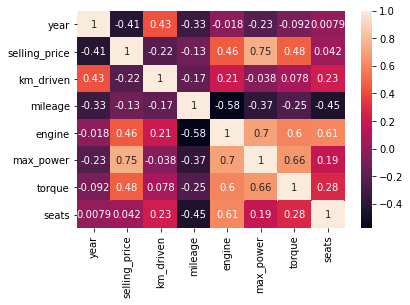

In [326]:
import seaborn as sns
sns.heatmap(car_data_dropped.corr(),annot=True)

In [327]:
car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])

<ipython-input-327-a8599f9f7704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['selling_price_log'] = np.log1p(car_data_dropped['selling_price'])


In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price_log~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+torque+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor                         features
0   2376.977479                        Intercept
1      1.254063                    name[T.Ashok]
2     11.301906                     name[T.Audi]
3     31.084377                      name[T.BMW]
4     57.388564                name[T.Chevrolet]
5      1.763148                   name[T.Daewoo]
6     17.399534                   name[T.Datsun]
7     11.317401                     name[T.Fiat]
8      2.519847                    name[T.Force]
9     94.304925                     name[T.Ford]
10   112.320472                    name[T.Honda]
11   286.468607                  name[T.Hyundai]
12     2.273852                    name[T.Isuzu]
13    19.161492                   name[T.Jaguar]
14     8.954954                     name[T.Jeep]
15     2.019785                      name[T.Kia]
16     2.538005                     name[T.Land]
17     9.984729                    name[T.Lexus]
18     1.774903                       name[T.MG]
19   173.816980     

<AxesSubplot:>

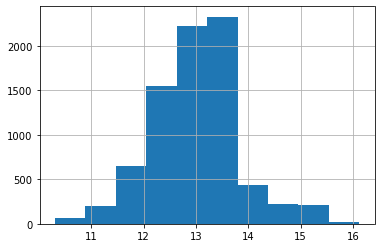

In [329]:
car_data_dropped['selling_price_log'].hist()

In [330]:
local = ['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Toyota', 'Ford', 'Chevrolet', 'Renualt', 'Skoda', 'Nissan', 'Datsun', 'Fiat', 'Jeep', 'Force', 'Isuzu', 'Ambassador', 'Ashok']
imported = ['Volkswagen', 'BMW', 'Jaguar', 'Volvo', 'Mercedes-Benz', 'Audi', 'Lexus', 'Mitsubishi','Land' , 'Kia', 'MG', 'Daewoo', 'Opel']

In [331]:
def name_encoding(s):
    if s in local:
        return 'local'
    else:
        return 'imported'
    

In [332]:
car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)

<ipython-input-332-a303a1bd2017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['name'] = car_data_dropped['name'].apply(name_encoding)


In [333]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [335]:
car_data_dropped['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [336]:
def fuel_encoding(s):
    if s in ['Petrol', 'Diesel']:
        return 'Coventional'
    else:
        return 'Others'
car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


<ipython-input-336-e6d31b0f6c25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['fuel'] = car_data_dropped['fuel'].apply(fuel_encoding)


In [347]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,First Owner,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,First Owner,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [338]:
model =smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1284.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:01:06   Log-Likelihood:            -1.1393e+05
No. Observations:                7906   AIC:                         2.279e+05
Df Residuals:                    7890   BIC:                         2.280e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.741e+05      6e+04      6.231      0.000    2.56e+05    4.92e+05
name[T.local]                   -4.972e+05   1.87e+04    -26.556      0.000   -5.34e+05   -4.61e+05
fuel[T.Others]                   1.408e+05   4.76e+04      2.957      0.003    4.74e+04    2.34e+05
seller_type[T.Individual]       -2.136e+05   1.58e+04    -13.485      0.000   -2.45e+05   -1.83e+05
seller_type[T.Trustmark Dealer] -2.495e+05   3.23e+04     -7.726      0.000   -3.13e+05   -1.86e+05
transmission[T.Manual]          -3.697e+05   1.89e+04    -19.521      0.000   -4.07e+05   -3.33e+05
owner[T.Fourth & Above Owner]    8127.2066   3.68e+04      0.221      0.825   -6.39e+04    8.02e+04
owner[T.Second Owner]           -4.461e+04   1.28e+04     -3.490      0.000   -6.97e+04   -1.96e+04
owner[T.Test Drive Car]          1.963e+06   1.97e+05      9.959      0.000    1.58e+06    2.35e+06
owner[T.Third Owner]            -2.131e+04    2.2e+04     -0.968      0.333   -6.45e+04    2.19e+04
year                            -3.116e+04   1778.714    -17.519      0.000   -3.46e+04   -2.77e+04
km_driven                          -0.9577      0.103     -9.323      0.000      -1.159      -0.756
mileage                          1.565e+04   1700.332      9.206      0.000    1.23e+04     1.9e+04
engine                            125.9395     17.338      7.264      0.000      91.953     159.926
max_power                        1.137e+04    260.829     43.611      0.000    1.09e+04    1.19e+04
torque                            -45.0339     59.667     -0.755      0.450    -161.996      71.929
==============================================================================
Omnibus:                     3701.832   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59359.894
Skew:                           1.836   Prob(JB):                         0.00
Kurtosis:                      15.912   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [348]:
def condense_owner(owner_str):
    if isinstance(owner_str, str):
#         if owner_str in ['Fourth & Above Owner', 'Third Owner']:
        if owner_str != 'First Owner':
#             return 'Third & Above'
            return 'Old'
        else:
#             return owner_str
            return 'New' 
        
car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)
car_data_dropped.head()

<ipython-input-348-77306b6168a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_dropped['owner'] = car_data_dropped['owner'].apply(condense_owner)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297


In [349]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,New,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Old,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,New,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,New,23.57,1396.0,70.00,140.000000,5.0,12.577640


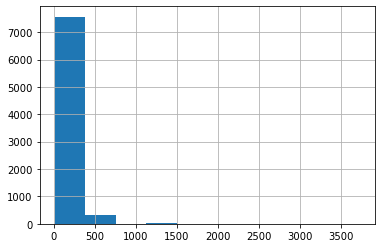

In [340]:
car_data_dropped['torque'].hist();

In [341]:
car_data_dropped['torque'].value_counts()


200.000000    693
190.000000    611
90.000000     408
113.000000    262
114.000000    246
             ... 
456.009225      1
185.000000      1
115.718470      1
314.793465      1
100.027830      1
Name: torque, Length: 253, dtype: int64

In [280]:
model =smf.ols('selling_price ~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+engine+max_power',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1719.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:50:39   Log-Likelihood:            -1.1398e+05
No. Observations:                7906   AIC:                         2.280e+05
Df Residuals:                    7894   BIC:                         2.281e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.052e+05   5.96e+04      6.802      0.000    2.88e+05    5.22e+05
name[T.local]                   -5.013e+05   1.88e+04    -26.673      0.000   -5.38e+05   -4.64e+05
fuel[T.Others]                   1.429e+05   4.79e+04      2.983      0.003     4.9e+04    2.37e+05
seller_type[T.Individual]       -2.208e+05   1.59e+04    -13.864      0.000   -2.52e+05    -1.9e+05
seller_type[T.Trustmark Dealer] -2.553e+05   3.24e+04     -7.884      0.000   -3.19e+05   -1.92e+05
transmission[T.Manual]          -3.716e+05    1.9e+04    -19.507      0.000   -4.09e+05   -3.34e+05
owner[T.Old]                    -3.059e+04   1.22e+04     -2.505      0.012   -5.45e+04   -6654.544
year                            -3.151e+04   1766.037    -17.841      0.000    -3.5e+04    -2.8e+04
km_driven                          -0.9640      0.103     -9.328      0.000      -1.167      -0.761
mileage                          1.504e+04   1691.866      8.887      0.000    1.17e+04    1.84e+04
engine                            117.5288     16.800      6.996      0.000      84.597     150.460
max_power                        1.136e+04    244.675     46.417      0.000    1.09e+04    1.18e+04
==============================================================================
Omnibus:                     3853.144   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63773.346
Skew:                           1.927   Prob(JB):                         0.00
Kurtosis:                      16.369   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [343]:
model =smf.ols('selling_price ~name+year+km_driven+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1374.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:01:37   Log-Likelihood:            -1.1393e+05
No. Observations:                7906   AIC:                         2.279e+05
Df Residuals:                    7891   BIC:                         2.280e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.742e+05   6.01e+04      6.231      0.000    2.56e+05    4.92e+05
name[T.local]                   -4.971e+05   1.87e+04    -26.537      0.000   -5.34e+05    -4.6e+05
seller_type[T.Individual]       -2.128e+05   1.58e+04    -13.426      0.000   -2.44e+05   -1.82e+05
seller_type[T.Trustmark Dealer] -2.505e+05   3.23e+04     -7.753      0.000   -3.14e+05   -1.87e+05
transmission[T.Manual]          -3.706e+05   1.89e+04    -19.566      0.000   -4.08e+05   -3.33e+05
owner[T.Fourth & Above Owner]    8244.8799   3.68e+04      0.224      0.823   -6.39e+04    8.03e+04
owner[T.Second Owner]           -4.426e+04   1.28e+04     -3.462      0.001   -6.93e+04   -1.92e+04
owner[T.Test Drive Car]          1.964e+06   1.97e+05      9.961      0.000    1.58e+06    2.35e+06
owner[T.Third Owner]            -2.094e+04    2.2e+04     -0.950      0.342   -6.41e+04    2.22e+04
year                            -3.114e+04   1779.573    -17.499      0.000   -3.46e+04   -2.77e+04
km_driven                          -0.9539      0.103     -9.282      0.000      -1.155      -0.752
mileage                          1.584e+04   1700.006      9.317      0.000    1.25e+04    1.92e+04
engine                            125.9825     17.346      7.263      0.000      91.979     159.986
max_power                        1.136e+04    260.895     43.535      0.000    1.08e+04    1.19e+04
torque                            -51.6844     59.654     -0.866      0.386    -168.621      65.252
==============================================================================
Omnibus:                     3707.027   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59456.252
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                      15.921   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,New,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Old,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,New,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,New,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [351]:
model =smf.ols('selling_price ~name+year+km_driven+seller_type+transmission+owner+mileage+engine+max_power+torque',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1717.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:05:32   Log-Likelihood:            -1.1398e+05
No. Observations:                7906   AIC:                         2.280e+05
Df Residuals:                    7894   BIC:                         2.281e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.977e+05   6.04e+04      6.584      0.000    2.79e+05    5.16e+05
name[T.local]                   -5.022e+05   1.88e+04    -26.645      0.000   -5.39e+05   -4.65e+05
seller_type[T.Individual]       -2.198e+05   1.59e+04    -13.798      0.000   -2.51e+05   -1.89e+05
seller_type[T.Trustmark Dealer] -2.584e+05   3.25e+04     -7.948      0.000   -3.22e+05   -1.95e+05
transmission[T.Manual]          -3.721e+05   1.91e+04    -19.518      0.000   -4.09e+05   -3.35e+05
owner[T.Old]                    -3.031e+04   1.22e+04     -2.481      0.013   -5.43e+04   -6360.300
year                            -3.141e+04   1770.046    -17.744      0.000   -3.49e+04   -2.79e+04
km_driven                          -0.9578      0.103     -9.261      0.000      -1.161      -0.755
mileage                          1.542e+04   1710.173      9.016      0.000    1.21e+04    1.88e+04
engine                            121.2026     17.439      6.950      0.000      87.017     155.388
max_power                        1.141e+04    262.512     43.481      0.000    1.09e+04    1.19e+04
torque                            -53.5816     59.997     -0.893      0.372    -171.192      64.029
==============================================================================
Omnibus:                     3853.166   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63804.407
Skew:                           1.927   Prob(JB):                         0.00
Kurtosis:                      16.373   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


    VIF Factor                         features
0   143.688716                        Intercept
1     1.341517                    name[T.local]
2     1.011324                   fuel[T.Others]
3     1.448239        seller_type[T.Individual]
4     1.230049  seller_type[T.Trustmark Dealer]
5     1.680141           transmission[T.Manual]
6     1.355896                     owner[T.Old]
7     1.885557                             year
8     1.394904                        km_driven
9     1.888537                          mileage
10    3.098130                        max_power
11    2.902064                           engine


# Influential points

In [353]:
infl = model.get_influence()

In [354]:
import scipy
n = car_data_dropped.shape[0]
p = 13
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?

In [355]:
atyp_index_set = set(car_data_dropped.index[atyp_stud])
print(len(atyp_index_set))

317


In [356]:
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/n
atyp_index_set_2 = set(car_data_dropped.index[atyp_cook])

In [357]:
print(len(atyp_index_set_2))

459


In [358]:
atyp_intersection_index_set = atyp_index_set.union(atyp_index_set_2)
print(len(atyp_intersection_index_set))

461


In [359]:
print(car_data_dropped.shape)
car_data_dropped = car_data_dropped.drop(atyp_intersection_index_set)
print(car_data_dropped.shape)

(7906, 14)
(7445, 14)


In [360]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,7,450000,145500,Coventional,Individual,Manual,New,23.40,1248.0,74.00,190.000000,5.0,13.017005
1,local,7,370000,120000,Coventional,Individual,Manual,Old,21.14,1498.0,103.52,250.000000,5.0,12.821261
2,local,15,158000,140000,Coventional,Individual,Manual,Old,17.70,1497.0,78.00,124.544455,5.0,11.970357
3,local,11,225000,127000,Coventional,Individual,Manual,New,23.00,1396.0,90.00,219.668960,5.0,12.323860
4,local,14,130000,120000,Coventional,Individual,Manual,New,16.10,1298.0,88.20,112.776475,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,local,8,320000,110000,Coventional,Individual,Manual,New,18.50,1197.0,82.85,113.700000,5.0,12.676079
8124,local,14,135000,119000,Coventional,Individual,Manual,Old,16.80,1493.0,110.00,235.359600,5.0,11.813037
8125,local,12,382000,120000,Coventional,Individual,Manual,New,19.30,1248.0,73.90,190.000000,5.0,12.853179
8126,local,8,290000,25000,Coventional,Individual,Manual,New,23.57,1396.0,70.00,140.000000,5.0,12.577640


In [361]:
model =smf.ols('selling_price ~name+year+km_driven+seller_type+transmission+owner+mileage+engine+max_power',data=car_data_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2364.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:06:47   Log-Likelihood:            -1.0233e+05
No. Observations:                7445   AIC:                         2.047e+05
Df Residuals:                    7434   BIC:                         2.048e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.237e+05    3.3e+04      9.805      0.000    2.59e+05    3.88e+05
name[T.local]                   -3.087e+05   1.09e+04    -28.449      0.000    -3.3e+05   -2.87e+05
seller_type[T.Individual]       -1.134e+05   8693.494    -13.047      0.000    -1.3e+05   -9.64e+04
seller_type[T.Trustmark Dealer] -9.489e+04   1.68e+04     -5.644      0.000   -1.28e+05   -6.19e+04
transmission[T.Manual]          -3.044e+05   1.04e+04    -29.135      0.000   -3.25e+05   -2.84e+05
owner[T.Old]                    -3.408e+04   6404.224     -5.322      0.000   -4.66e+04   -2.15e+04
year                             -2.74e+04   1007.744    -27.186      0.000   -2.94e+04   -2.54e+04
km_driven                          -0.9535      0.072    -13.245      0.000      -1.095      -0.812
mileage                            1.1e+04    923.883     11.905      0.000    9187.623    1.28e+04
engine                            183.7339      9.093     20.206      0.000     165.909     201.559
max_power                        7698.0908    138.549     55.562      0.000    7426.495    7969.687
==============================================================================
Omnibus:                     1025.287   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3764.847
Skew:                           0.666   Prob(JB):                         0.00
Kurtosis:                       6.219   Cond. No.                     1.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                         features
0   159.481456                        Intercept
1     1.097838                    name[T.local]
2     1.012609                   fuel[T.Others]
3     1.424322        seller_type[T.Individual]
4     1.259100  seller_type[T.Trustmark Dealer]
5     1.362303           transmission[T.Manual]
6     1.356419                     owner[T.Old]
7     2.032547                             year
8     1.655513                        km_driven
9     1.950041                          mileage
10    2.317877                        max_power
11    2.757421                           engine


### selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+engine'

## Heteroscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

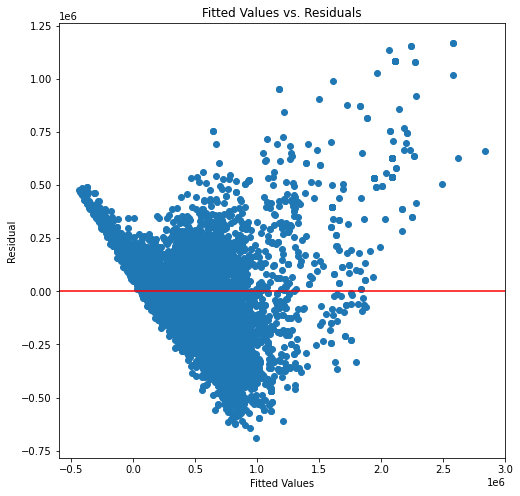

In [364]:
fig, ax = plt.subplots(figsize=(8,8))
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
ax.axhline(y=0, color = 'red')
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [365]:
model_log =smf.ols('selling_price_log ~name+year+km_driven+seller_type+transmission+owner+mileage+engine+max_power',data=car_data_dropped).fit()
model_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      selling_price_log   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     4166.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:08:29   Log-Likelihood:                -1225.2
No. Observations:                7445   AIC:                             2472.
Df Residuals:                    7434   BIC:                             2548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          12.1048      0.042    289.722      0.000      12.023      12.187
name[T.local]                      -0.1233      0.014     -8.975      0.000      -0.150      -0.096
seller_type[T.Individual]          -0.0835      0.011     -7.590      0.000      -0.105      -0.062
seller_type[T.Trustmark Dealer]    -0.0134      0.021     -0.629      0.530      -0.055       0.028
transmission[T.Manual]             -0.1323      0.013    -10.003      0.000      -0.158      -0.106
owner[T.Old]                       -0.0643      0.008     -7.939      0.000      -0.080      -0.048
year                               -0.1092      0.001    -85.608      0.000      -0.112      -0.107
km_driven                       -3.783e-07   9.11e-08     -4.153      0.000   -5.57e-07      -2e-07
mileage                             0.0236      0.001     20.203      0.000       0.021       0.026
engine                              0.0005   1.15e-05     39.232      0.000       0.000       0.000
max_power                           0.0097      0.000     55.211      0.000       0.009       0.010
==============================================================================
Omnibus:                      405.113   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.683
Skew:                          -0.477   Prob(JB):                    3.00e-132
Kurtosis:                       4.022   Cond. No.                     1.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

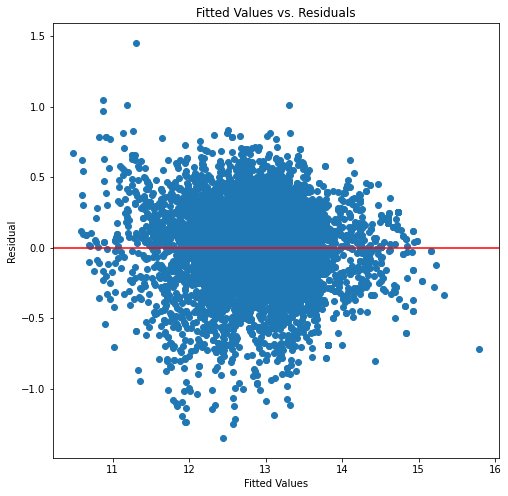

In [366]:
fig, ax = plt.subplots(figsize=(8,8))
p = model_log.fittedvalues
res = model_log.resid
plt.scatter(p,res)
ax.axhline(y=0, color = 'red')
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [373]:
from statsmodels.stats.diagnostic import het_breuschpagan
model_log = smf.ols('selling_price_log~C(name)+year+km_driven+C(fuel)+C(seller_type)+C(transmission)+C(owner)+mileage+max_power+engine', data = car_data_dropped).fit()
bp_test = het_breuschpagan(model_log.resid, model_log.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 482.869899304075, 'LM-Test p-value': 1.438844883331345e-96}


In [ ]:
selling_price~name+year+km_driven+fuel+seller_type+transmission+owner+mileage+max_power+engine'

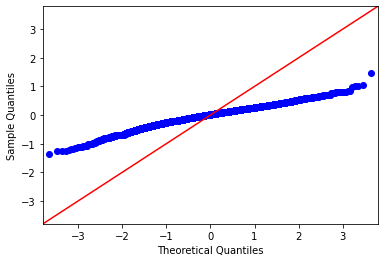

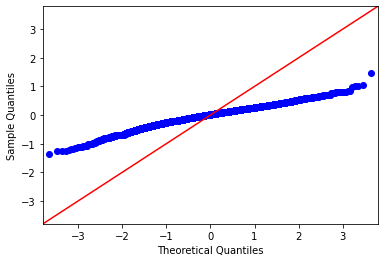

In [375]:
# we observe heavy tails, kurotsis, but no skewness, due to categroical variables
sm.qqplot(model_log.resid, line = '45')

In [376]:
car_data_dropped["res_sq"] = model_log.resid**2
model_res = smf.ols("res_sq ~ C(name)+year+km_driven+C(fuel)+C(seller_type)+C(transmission)+C(owner)+mileage+max_power+engine", data=car_data_dropped).fit()  
weight = model_res.fittedvalues
weight = abs(weight) 
weight = weight**-1 
car_data_dropped['weight'] = weight

In [372]:
y=car_data_dropped.selling_price_log
x=car_data_dropped[['name','year', 'km_driven','fuel','seller_type','transmission','owner','mileage','max_power','torque','engine']]

In [ ]:
mod_wls = sm.WLS(y,x.astype(float), car_data_dropped['weight'])
mod_res = mod_wls.fit()
print(mod_res.summary())

In [62]:
y, X = dmatrices('selling_price_log~name+year+km_driven+transmission+owner+mileage+max_power+engine', data=car_data_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                features
0   17.993628               Intercept
1    1.246357           name[T.local]
2    1.519155  transmission[T.Manual]
3    1.336562            owner[T.Old]
4    2.468993                    year
5    2.060872               km_driven
6    1.731869                 mileage
7    3.144153               max_power
8    3.241361                  engine


In [71]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
0,local,0.288262,450000,1.222966,Coventional,Individual,Manual,New,0.963726,-0.301271,-0.430449,5.252273,5.0,13.017005
1,local,0.288262,370000,1.003853,Coventional,Individual,Manual,Old,0.385545,0.292664,0.564363,5.525453,5.0,12.821261
2,local,1.741377,158000,1.179147,Coventional,Individual,Manual,Old,-0.494518,0.290492,-0.274704,4.832660,5.0,11.970357
3,local,1.138280,225000,1.068325,Coventional,Individual,Manual,New,0.861393,0.063264,0.149165,5.396664,5.0,12.323860
4,local,1.606079,130000,1.003853,Coventional,Individual,Manual,New,-0.903850,-0.173498,0.089281,4.734236,5.0,11.775297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,local,0.288262,475000,0.542776,Coventional,Individual,Manual,Old,0.743710,0.063264,0.107038,5.396804,5.0,13.071072
8123,local,0.535183,320000,0.904908,Coventional,Individual,Manual,New,-0.289852,-0.436981,-0.096113,4.742320,5.0,12.676079
8124,local,1.606079,135000,0.994337,Coventional,Individual,Manual,Old,-0.724767,0.281788,0.744662,5.465354,5.0,11.813037
8126,local,0.535183,290000,-0.779892,Coventional,Individual,Manual,New,1.007217,0.063264,-0.594731,4.948760,5.0,12.577640


In [70]:
model = smf.ols('selling_price_log~name+year+km_driven+fuel+mileage+max_power+engine', data = car_data_dropped).fit()

In [72]:
car_data_dropped["res_sq"] = model.resid**2
model_res = model = smf.ols('selling_price_log~name+year+km_driven+fuel+mileage+max_power+engine', data = car_data_dropped).fit()  
weight = model_res.fittedvalues
weight = abs(weight) 
weight = weight**-1 
car_data_dropped['weight'] = weight

In [73]:
car_data_dropped

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log,res_sq,weight
0,local,0.288262,450000,1.222966,Coventional,Individual,Manual,New,0.963726,-0.301271,-0.430449,5.252273,5.0,13.017005,0.072865,0.078449
1,local,0.288262,370000,1.003853,Coventional,Individual,Manual,Old,0.385545,0.292664,0.564363,5.525453,5.0,12.821261,0.115270,0.075983
2,local,1.741377,158000,1.179147,Coventional,Individual,Manual,Old,-0.494518,0.290492,-0.274704,4.832660,5.0,11.970357,0.061362,0.081846
3,local,1.138280,225000,1.068325,Coventional,Individual,Manual,New,0.861393,0.063264,0.149165,5.396664,5.0,12.323860,0.120648,0.078919
4,local,1.606079,130000,1.003853,Coventional,Individual,Manual,New,-0.903850,-0.173498,0.089281,4.734236,5.0,11.775297,0.230593,0.081596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,local,0.288262,475000,0.542776,Coventional,Individual,Manual,Old,0.743710,0.063264,0.107038,5.396804,5.0,13.071072,0.005399,0.076937
8123,local,0.535183,320000,0.904908,Coventional,Individual,Manual,New,-0.289852,-0.436981,-0.096113,4.742320,5.0,12.676079,0.002904,0.079226
8124,local,1.606079,135000,0.994337,Coventional,Individual,Manual,Old,-0.724767,0.281788,0.744662,5.465354,5.0,11.813037,0.603021,0.079431
8126,local,0.535183,290000,-0.779892,Coventional,Individual,Manual,New,1.007217,0.063264,-0.594731,4.948760,5.0,12.577640,0.017866,0.078670


In [75]:
y=['selling_price_log']

In [77]:
mod_wls = sm.WLS(y,xastype(float), car_data_dropped['weight'])
mod_res = mod_wls.fit()
print(mod_res.summary())

AttributeError: 'list' object has no attribute 'astype'